<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2
import requests
from bs4 import BeautifulSoup
from collections import defaultdict

In [2]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 


In [3]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

In [6]:
# connection.close()

# Юнит 3. Предварительный анализ данных

Структура БД

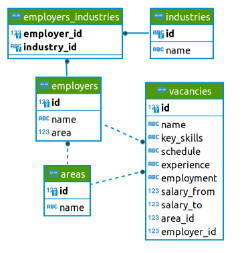

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [4]:
# текст запроса
query_3_1 = f'''
SELECT
    COUNT(*) vacancies_count
FROM
    public.vacancies
'''

In [5]:
# результат запроса
df = pd.read_sql_query(query_3_1, connection)
df

C:\Users\Gera\AppData\Local\Temp\ipykernel_13084\1114379196.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_1, connection)


,vacancies_count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [6]:
# текст запроса
query_3_2 = f'''
SELECT
    COUNT(*) employers_count
FROM
    public.employers
'''

In [7]:
# результат запроса
df = pd.read_sql_query(query_3_2, connection)
df

C:\Users\Gera\AppData\Local\Temp\ipykernel_13084\3062646138.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_2, connection)


,employers_count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [8]:
# текст запроса
query_3_3 = f'''
SELECT
    COUNT(*) areas_count
FROM
    public.areas
'''

In [9]:
# результат запроса
df = pd.read_sql_query(query_3_3, connection)
df

C:\Users\Gera\AppData\Local\Temp\ipykernel_13084\928149064.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_3, connection)


,areas_count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [10]:
# текст запроса
query_3_4 = f'''
SELECT
    COUNT(*) industries_count
FROM
    public.industries
'''

In [11]:
# результат запроса
df = pd.read_sql_query(query_3_4, connection)
df

C:\Users\Gera\AppData\Local\Temp\ipykernel_13084\2101691108.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_4, connection)


,industries_count
0,294


*** 
выводы по предварительному анализу данных

Есть работодатели с более двумя вакансиями с разными требованиями. \
Есть сферы деятельности с более чем 170 вакансиями.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [22]:
# текст запроса
query_4_1 = f'''
SELECT
    a.name area,
    COUNT(*) vacancies_count
FROM
    public.vacancies v
-- inner join так как у каждой вакансии есть id региона который так же есть и в таблице areas
JOIN public.areas a ON a.id = v.area_id
GROUP BY a.id
ORDER BY 2 DESC
'''

In [23]:
# результат запроса
df = pd.read_sql_query(query_4_1, connection)
df

C:\Users\Gera\AppData\Local\Temp\ipykernel_13084\2457173557.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_1, connection)


,area,vacancies_count
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
764,Кизляр,1
765,Джизак,1
766,Эртиль,1
767,Арсеньев,1


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [24]:
# текст запроса
query_4_2 = f'''
SELECT
    COUNT(*) vacancies_count
FROM
    public.vacancies v
WHERE
    v.salary_from IS NOT NULL OR v.salary_to IS NOT NULL
'''

In [260]:
# результат запроса
df = pd.read_sql_query(query_4_2, connection)
df

C:\Users\Gera\AppData\Local\Temp\ipykernel_10844\970655580.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_2, connection)


,vacancies_count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [243]:
# текст запроса
query_4_3 = f'''
SELECT
    ROUND(AVG(v.salary_from)) avg_from,
    ROUND(AVG(v.salary_to)) avg_to
FROM
    public.vacancies v
'''

In [244]:
# результат запроса
df = pd.read_sql_query(query_4_3, connection)
df

C:\Users\Gera\AppData\Local\Temp\ipykernel_10844\2500607024.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_3, connection)


,avg_from,avg_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [257]:
# текст запроса
query_4_4 = f'''
SELECT
    v.schedule,   -- Рабочий график
    v.employment, -- Тип трудоустройства
    COUNT(v.id) vacancies_count
FROM
    public.vacancies v
GROUP BY schedule, employment
-- Добавим общее число вакансий
UNION ALL
SELECT
    'ALL',
    'ALL',
    COUNT(v.id)
FROM
    public.vacancies v

ORDER BY 3 DESC
'''

In [258]:
# результат запроса
df = pd.read_sql_query(query_4_4, connection)
df

C:\Users\Gera\AppData\Local\Temp\ipykernel_10844\2022935265.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_4, connection)


,schedule,employment,vacancies_count
0,ALL,ALL,49197
1,Полный день,Полная занятость,35367
2,Удаленная работа,Полная занятость,7802
3,Гибкий график,Полная занятость,1593
4,Удаленная работа,Частичная занятость,1312
5,Сменный график,Полная занятость,940
6,Полный день,Стажировка,569
7,Вахтовый метод,Полная занятость,367
8,Полный день,Частичная занятость,347
9,Гибкий график,Частичная занятость,312


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [263]:
# текст запроса
query_4_5 = f'''
SELECT
    v.experience,
    COUNT(v.id) vacancies_count
FROM
    public.vacancies v
GROUP BY experience
ORDER BY 2
'''

In [264]:
# результат запроса
df = pd.read_sql_query(query_4_5, connection)
df

C:\Users\Gera\AppData\Local\Temp\ipykernel_10844\2316260449.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_5, connection)


,experience,vacancies_count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***
выводы по детальному анализу вакансий

10% вакансий приходятся на Москву. \
У половины вакансий вообще не указана зарплата. Возможно работодателям так проще найти людей. \
Более 90% вакансий приходятся на тип трудоустройства полная занятость. \
У половины вакансий указан опыт работы От 1 года до 3 лет.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [253]:
# текст запроса
query_5_1 = f'''
-- <Работодатель, кол-во вакансий>
SELECT
    e.name employer,
    COUNT(v.id) vacancies_count
FROM
    public.vacancies v
JOIN public.employers e ON e.id = v.employer_id
GROUP BY e.id
-- Добавим общее число вакансий
UNION ALL
SELECT
    'ALL',
    COUNT(v.id)
FROM
    public.vacancies v

ORDER BY 2 DESC
LIMIT {10}
'''

In [254]:
# результат запроса
df = pd.read_sql_query(query_5_1, connection)
df

C:\Users\Gera\AppData\Local\Temp\ipykernel_10844\3834399874.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_1, connection)


,employer,vacancies_count
0,ALL,49197
1,Яндекс,1933
2,Ростелеком,491
3,Тинькофф,444
4,СБЕР,428
5,Газпром нефть,331
6,ИК СИБИНТЕК,327
7,МТС,292
8,DataArt,247
9,Совкомбанк Технологии,204


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [265]:
# Не получилось сделать без создания отдельных таблиц
# И чтобы при этом были все регионы

# текст запроса
query_5_2 = f'''
-- <Регион, кол-во работодателей, кол-во вакансий>
WITH 
-- Таблица с кол-вом регистраций работодателей в регионе
employers_count AS 
(
SELECT
    a.name,
    a.id,
    COUNT(distinct e.id) employers_count
FROM public.areas a
LEFT JOIN public.employers e on a.id = e.area
GROUP BY a.id
),
-- Таблица с кол-вом вакансий в регионе
vacancies_count AS
(
SELECT
    a.name,
    a.id,
    COUNT(v.id) vacancies_count
FROM public.areas a
LEFT JOIN public.vacancies v on a.id = v.area_id 
GROUP BY a.id
)
-- Склеиваем таблицы по столбцу id регионов
SELECT
    t1.name,
    t1.employers_count,
    t2.vacancies_count
FROM employers_count t1
JOIN vacancies_count t2 ON t1.id = t2.id
ORDER BY 3, 2 DESC
'''

In [266]:
# результат запроса
df = pd.read_sql_query(query_5_2, connection)
df

C:\Users\Gera\AppData\Local\Temp\ipykernel_10844\2250345976.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_2, connection)


,name,employers_count,vacancies_count
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Ростовская область,18,0
...,...,...,...
1357,Алматы,721,1892
1358,Новосибирск,573,2006
1359,Минск,1115,2112
1360,Санкт-Петербург,2217,2851


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [269]:
# текст запроса
query_5_3 = f'''
-- <Работодатель, кол-во регионов>
SELECT
    e.name employer,
    COUNT(DISTINCT v.area_id) areas_count
FROM
    public.employers e
LEFT JOIN public.vacancies v ON e.id = v.employer_id
GROUP BY e.id
ORDER BY 2 DESC
'''

In [270]:
# результат запроса
df = pd.read_sql_query(query_5_3, connection)
df

C:\Users\Gera\AppData\Local\Temp\ipykernel_10844\201667002.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_3, connection)


,employer,areas_count
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
23496,Но Смокинг,0
23497,МАСТЕРСКАЯ CREED,0
23498,Dzing Finance,0
23499,КОРС,0


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [25]:
# текст запроса
query_5_4 = f'''
SELECT
    COUNT(*) employers_count
FROM public.employers e
WHERE e.id NOT IN (SELECT employer_id FROM public.employers_industries)
'''

In [26]:
# результат запроса
df = pd.read_sql_query(query_5_4, connection)
df

C:\Users\Gera\AppData\Local\Temp\ipykernel_13084\3493105328.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_4, connection)


,employers_count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [63]:
# текст запроса
query_5_5 = f'''
SELECT
    e.name
FROM public.employers e
-- inner join так как нам не важны работодатели без сфер деятельности и сферы деятельности без работодателей(если такие вообще есть)
JOIN public.employers_industries ei ON e.id = ei.employer_id
GROUP BY e.id
HAVING COUNT(ei.industry_id) = 4
ORDER BY 1
OFFSET 2 LIMIT 1
'''

In [64]:
# результат запроса
df = pd.read_sql_query(query_5_5, connection)
df

C:\Users\Gera\AppData\Local\Temp\ipykernel_11020\388711819.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_5, connection)


,name
0,2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [73]:
# текст запроса
query_5_6 = f'''
SELECT
    COUNT(*) employers_count
FROM public.employers e
JOIN public.employers_industries ei ON e.id = ei.employer_id
JOIN public.industries i ON ei.industry_id = i.id
WHERE i.name = 'Разработка программного обеспечения'
'''

In [74]:
# результат запроса
df = pd.read_sql_query(query_5_6, connection)
df

C:\Users\Gera\AppData\Local\Temp\ipykernel_11020\821628714.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_6, connection)


,count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [28]:
# код для получения списка городов-милионников
cities = []
url = 'https://ru.wikipedia.org/wiki/Города-миллионеры_России'
response = requests.get(url) # Получаем страницу в формате HTML
page = BeautifulSoup(response.text, 'html.parser') 
table = page.find('table', class_='standard sortable') # Находим нужную таблицу с городами-миллиониками
all_a = table.find_all('a') # Находим все элементы 'a' среди которых есть все нужные нам города
for i in range(4,20): # Пропускаем несколько первых элементов 'a'
    cities.append(all_a[i].text) # Получаем название города
cities = tuple(cities) # Почему то запрос не принимает список, но принимает кортеж
print(cities.__len__(), cities) # Выводим длину кортежа и сам кортеж с городами

16 ('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Красноярск', 'Челябинск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград')


In [31]:
# текст запроса
query_5_7 = f'''
SELECT
    a.name,
    COUNT(v.id)
FROM public.vacancies v
JOIN public.employers e ON e.id = v.employer_id
JOIN public.areas a ON a.id = v.area_id
-- Выбираем вакансии от Яндекса и только в городах-миллионниках
WHERE a.name IN {cities} and e.name = 'Яндекс'
GROUP BY a.id
UNION ALl
SELECT
    'TOTAL',
    COUNT(v.id)
FROM public.vacancies v
JOIN public.employers e ON e.id = v.employer_id
JOIN public.areas a ON a.id = v.area_id
WHERE e.name = 'Яндекс'
ORDER BY 2
'''

In [32]:
# результат запроса
df = pd.read_sql_query(query_5_7, connection)
df

C:\Users\Gera\AppData\Local\Temp\ipykernel_13084\1965596796.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_7, connection)


,name,count
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Самара,26
8,Уфа,26
9,Краснодар,30


***
выводы по анализу работодателей

Регионом может считаться что угодно начиная от района заканчивая страной. \
Есть регионы без вакансий. \
Есть работодатели без вакансий.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [104]:
# текст запроса
query_6_1 = f'''
SELECT
    COUNT(v.id)
FROM public.vacancies v
WHERE LOWER(v.name) LIKE '%data%' OR LOWER(v.name) LIKE '%данн%'
'''

In [105]:
# результат запроса
df = pd.read_sql_query(query_6_1, connection)
df

C:\Users\Gera\AppData\Local\Temp\ipykernel_10844\366702258.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_1, connection)


,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [4]:
# текст запроса
filter_DS = ''' 
  (v.name ILIKE '%data scientist%'
OR v.name ILIKE '%data science%'
OR v.name ILIKE '%исследователь данных%'
OR (v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%')
OR v.name ILIKE '%machine learning%'
OR v.name ILIKE '%машинн%обучен%')
'''
filter_jun = ''' 
  (v.name ILIKE '%junior%'
OR v.experience = 'Нет опыта'
OR v.employment = 'Стажировка')
'''
query_6_2 = f'''
SELECT
    COUNT(v.id)
FROM public.vacancies v
WHERE {filter_DS} AND {filter_jun}
'''

In [122]:
# результат запроса
df = pd.read_sql_query(query_6_2, connection)
df

C:\Users\Gera\AppData\Local\Temp\ipykernel_10844\2267038862.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_2, connection)


,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [129]:
# текст запроса
filter_SQL = ''' 
  (v.key_skills ILIKE '%postgres%'
OR v.key_skills LIKE '%SQL%')
'''
query_6_3 = f'''
SELECT
    COUNT(v.id)
FROM public.vacancies v
WHERE {filter_DS} AND {filter_SQL}
'''

In [130]:
# результат запроса
df = pd.read_sql_query(query_6_3, connection)
df

C:\Users\Gera\AppData\Local\Temp\ipykernel_10844\3794299702.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_3, connection)


,count
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [5]:
# текст запроса
query_6_4 = f'''
SELECT
    'DS & Python'  filter_vac,
    COUNT(v.id)
FROM public.vacancies v
WHERE {filter_DS} AND v.key_skills ILIKE '%python%'
-- Добавим строку без фильтра на навык Python
UNION ALL
SELECT
    'DS' filter_vac,
    COUNT(v.id)
FROM public.vacancies v
WHERE {filter_DS}
'''

In [6]:
# результат запроса
df_6_4 = pd.read_sql_query(query_6_4, connection)
df_6_4

C:\Users\Gera\AppData\Local\Temp\ipykernel_6240\614304167.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_4 = pd.read_sql_query(query_6_4, connection)


,filter_vac,count
0,DS,480
1,DS & Python,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [201]:
# текст запроса
query_6_5 = f'''
SELECT
-- Разбиваем строку на список > считаем кол-во элементов > считаем среднее по всему столбцу > округляем до 2-ух знаков после точки
    ROUND(AVG(cardinality(regexp_split_to_array(v.key_skills, '\t'))),2)
FROM public.vacancies v
WHERE {filter_DS}
'''

In [202]:
# результат запроса
df = pd.read_sql_query(query_6_5, connection)
df

C:\Users\Gera\AppData\Local\Temp\ipykernel_10844\4273863405.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_5, connection)


,round
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [49]:
# текст запроса
query_6_6 = f'''
SELECT
    v.experience,
    -- Если среднее null, то берём не null зарплату > считаем среднее > округляем
    ROUND(AVG(COALESCE((v.salary_from+v.salary_to)/2, v.salary_from, v.salary_to)),0) salary_avg,
    -- Добавим дополнительно среднее количество навыков для конкретного опыта работы
    ROUND(AVG(cardinality(regexp_split_to_array(v.key_skills, '\t'))),2) skills_count_avg,
    -- Добавим количество вакансий
    COUNT(v.id)
FROM public.vacancies v
-- Фильтр на направление DS и на то что хотя бы одно значение зарплаты не null
WHERE {filter_DS} and (v.salary_from IS NOT NULL OR v.salary_to IS NOT NULL)
GROUP BY v.experience
'''

In [50]:
# результат запроса
df = pd.read_sql_query(query_6_6, connection)
df

C:\Users\Gera\AppData\Local\Temp\ipykernel_6240\519194770.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_6, connection)


,experience,salary_avg,skills_count_avg,count
0,Нет опыта,74643.0,7.71,7
1,От 1 года до 3 лет,139675.0,6.83,28
2,От 3 до 6 лет,243115.0,5.44,27


***
выводы по предметному анализу

Около 70% вакансий на направление Data Science имеют требование к владению Python. \
Количество вакансий без опыта работы значительно меньше с чем опытом. \
Чем больше опыт работы - тем больше зарплата, но меньше количество требуемых навыков.
Возможно из-за того что при большом опыте работы многие навыки просто не указываются, потому что ими ожидаемо будут владеть исходя из других требований.

# Общий вывод по проекту

*Выводы учитывают допольнительные исследования.*

Чем больше опыт работы - тем больше зарплата. \
В крупных городах больше всего вакансий. \
Большая часть вакансий на Полный день/Удаленная работа и Полная занятость. \
На направлении DS зарплата относительно больше. \
На направлении DS отношение количества вакансий 'без опыта' \ 'с опытом' - меньше чем на общем фоне. Это говорит о том что на направлении DS значительно более востребованы люди с опытом работы.

1. Сделаем запрос как в 6.6, только без фильтра на DS

In [51]:
# текст запроса
query_7_1 = f'''
SELECT
    v.experience,
    -- Если среднее null, то берём не null зарплату > считаем среднее > округляем
    ROUND(AVG(COALESCE((v.salary_from+v.salary_to)/2, v.salary_from, v.salary_to)),0) salary_avg,
    -- Добавим дополнительно среднее количество навыков для конкретного опыта работы
    ROUND(AVG(cardinality(regexp_split_to_array(v.key_skills, '\t'))),2) skills_count_avg,
    -- Добавим количество вакансий
    COUNT(v.id)
FROM public.vacancies v
-- Фильтр на то что хотя бы одно значение зарплаты не null
WHERE (v.salary_from IS NOT NULL OR v.salary_to IS NOT NULL)
GROUP BY v.experience
'''

In [53]:
df = pd.read_sql_query(query_7_1, connection)
df.sort_values(by='salary_avg')

C:\Users\Gera\AppData\Local\Temp\ipykernel_6240\4173692937.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_7_1, connection)


,experience,salary_avg,skills_count_avg,count
2,Нет опыта,40472.0,6.27,5055
3,От 1 года до 3 лет,76541.0,6.58,12819
1,От 3 до 6 лет,133211.0,6.71,5649
0,Более 6 лет,166256.0,7.35,550


2. Посмотрим на навыки по направлению Data Science и посчитаем количество вакансий для каждого.

In [10]:
# Получаем список навыков для каждой вакансии DS
query_get_skills = f'''
SELECT
    regexp_split_to_array(v.key_skills, '\t')
FROM public.vacancies v
-- Фильтр на направление DS
WHERE {filter_DS} and v.key_skills IS NOT NULL
'''
df = pd.read_sql_query(query_get_skills, connection)
# Создаем словарь <навык: кол-во вакансий> (считаем что в вакансии нет повторений)
skills_dict = defaultdict(int)
for i in df.index: # Цикл по вакансиям
    for skill in df.iloc[i,0]: # Цикл по навыкам в вакансии
        skills_dict[skill] += 1
# Создаем dataframe из словаря
df_skills = pd.DataFrame(data={'skill': skills_dict.keys(), 'count_vac': skills_dict.values()})
# Добавляем строку со всеми вакансиями для наглядности
df_skills.loc[-1] = ['ANY', df_6_4.iloc[0,1]]
df_skills.index = df_skills.index + 1

df_skills.sort_values(by='count_vac', ascending=False)[:20]

C:\Users\Gera\AppData\Local\Temp\ipykernel_6240\3626411232.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_get_skills, connection)


,skill,count_vac
0,ANY,480
1,Python,348
2,SQL,191
8,Machine Learning,114
10,Git,66
26,Математическая статистика,62
41,Data Analysis,54
46,Data Science,52
64,Pandas,52
5,ML,49


3. Добавим к предыдущей таблице, столбец со средней зарплатой для каждого навыка

In [45]:
def get_salary_avg(skill:str) -> int:
    """ Возвращает среднюю зарплату для конкретного навыка

    Args:
        skill (str): Навык

    Returns:
        int: Средняя зарпалата
    """    
    # Запрос
    query_get_salary_avg = f'''
    SELECT
        ROUND(AVG(COALESCE((v.salary_from+v.salary_to)/2, v.salary_from, v.salary_to)),0) salary_avg
    FROM public.vacancies v
    -- Фильтр на конкретный навык, на направление DS и чтобы хоть одно значение зарплаты было не null
    WHERE v.key_skills ILIKE '%{skill}%' AND {filter_DS} AND (v.salary_from IS NOT NULL OR v.salary_to IS NOT NULL)
    '''
    df = pd.read_sql_query(query_get_salary_avg, connection)
    salary_avg = df.iloc[0,0]
    return salary_avg
# Создаем новый столбец со средней зарплатой для каждого навыка
df_skills['salary_avg'] = df_skills['skill'].apply(get_salary_avg)

C:\Users\Gera\AppData\Local\Temp\ipykernel_6240\4061802758.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_get_salary_avg, connection)


In [46]:
# Выводим таблицу с фильтром от 10 вакансий для каждого навыка и сортируем по убыванию средней зарплаты
df_skills[df_skills['count_vac'] >= 10].sort_values(by='salary_avg', ascending=False)

,skill,count_vac,salary_avg
74,PostgreSQL,18,250000.0
15,Computer Vision,19,225798.0
163,Hadoop,33,225000.0
85,sklearn,19,215000.0
44,Английский язык,48,214875.0
71,Java,28,205000.0
37,Data Mining,21,204000.0
35,MS PowerPoint,22,200000.0
86,pytorch,13,197247.0
61,PyTorch,46,197247.0
